## TP4 Fonction Python

In [1]:
func_deux_fois  = lambda param : param*2
zero_dix_huit = [func_deux_fois(_) for _ in range(10)]
zero_dix_huit


[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [2]:
# EN UNE LIGNE AVEC MAP 
r = list( map ( lambda x: x+1, zero_dix_huit ))
r
# EQUIVALENT A ... UNE COMPREHENSION LIST !
r = [ x+1 for x in zero_dix_huit ]
r


[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [3]:
# filter() renvoie un itérateur
iterateur = filter(lambda x: x>10, zero_dix_huit)
liste     = list(iterateur)
liste


[12, 14, 16, 18]

In [4]:
# ITERATEUR ?
# c'est un objet dont on peut parcourir les valeurs une à une
# str, tuple, list, dict et set sont des itérables dont on peut obtenir un itérateur avec iter
# un intérateur garde en mémoire l'index du dernier élément accédé

mytuple = ("pomme", "tournevis", "haricot")
myit = iter(mytuple)

print(next(myit))
print(next(myit))
print(next(myit))


pomme
tournevis
haricot


In [ ]:
--------------------------
-------------------


iterateur = filter(lambda x: x>10, zero_dix_huit)
print(next(iterateur))
print(next(iterateur))

# L'appel à list() permet de récupérer la liste des éléments non encore accédés d'un itérateur
print(list(iterateur))


In [6]:

# Python offers many ways to display variables and expressions in a string literal  :

temp="25"
ville="Veracruz"


# CONCATENATION :

print("Il fait "+str(temp)+" degrés à "+ville)
# %-FORMATTED STRINGS

print( "Il fait %s degrés à %s " % (temp,ville) ) 
# string.format

print("Il fait {} degrés à {}".format(temp,ville))
# F-strings are a recent Python Enhancement. They came with Python 3.6,in 2015  
# They make formatting easier to write and read
# They always start with an "f" before the quotation mark

print( f"Il fait {temp} degrés à {ville}" )


Il fait 25 degrés à Veracruz
Il fait 25 degrés à Veracruz 
Il fait 25 degrés à Veracruz
Il fait 25 degrés à Veracruz


In [8]:
# Et comme pour MAP, on peut aussi utiliser une COMPREHENSION LIST..
liste= [x for x in zero_dix_huit if x>10]
liste
---------------------------------

SyntaxError: invalid syntax (<ipython-input-8-797118db4788>, line 4)

In [9]:
# You can put any valid Python expression inside the braces :
print( f"Il fait {2*temp} degrés à {ville}" )
print( f"Il fait {2*int(temp)} degrés à {ville.upper()}" )


Il fait 2525 degrés à Veracruz
Il fait 50 degrés à VERACRUZ


In [13]:
# You can put any valid Python expression inside the braces :
print( f"Il fait {2*temp} degrés à {ville}" )
print( f"Il fait {2*int(temp)} degrés à {ville.upper()}" )
import pandas as pd
nat= pd.read_csv("nat2019.csv",sep=";")
nat
# https://www.insee.fr/fr/statistiques/fichier/2540004/nat2019_csv.zip


Il fait 2525 degrés à Veracruz
Il fait 50 degrés à VERACRUZ


,sexe,preusuel,annais,nombre
0,1,_PRENOMS_RARES,1900,1250
1,1,_PRENOMS_RARES,1901,1340
2,1,_PRENOMS_RARES,1902,1329
3,1,_PRENOMS_RARES,1903,1285
4,1,_PRENOMS_RARES,1904,1427
...,...,...,...,...
652051,2,ZYNEB,2016,6
652052,2,ZYNEB,2017,6
652053,2,ZYNEB,2018,5
652054,2,ZYNEB,2019,7


In [14]:
# JE VEUX GARDER LA DERNIERE LETTRE DE CHAQUE PRENOM DANS UNE Series
def get_last_letter(x):
        return(x[-1])

last_letters = nat[nat.sexe==2].preusuel.map(get_last_letter) 


TypeError: 'float' object is not subscriptable

In [15]:
# Les message d'erreur est très clair, c'est x[-1] qui fait planter le programme
# Isolons ce code dans un TRY

def get_last_letter(x):
    try:
      _ = x[-1]
    except:
        print("An exception occurred")
        print(f"le fautif est {x}")
        return
    else:
        return(x[-1])

last_letters = nat[nat.sexe==2].preusuel.map(get_last_letter) 


An exception occurred
le fautif est nan
An exception occurred
le fautif est nan


In [17]:
last_letters = nat[nat.sexe==2].preusuel.map(get_last_letter) 
#https://fr.wikipedia.org/wiki/NaN
nat['type']=nat.preusuel.apply(type)
#nat[nat.type.str.contains("float")]
# https://fr.wikipedia.org/wiki/NaN

# un NaN est différent de lui même, c'est à ça qu'on les reconnait : 
nat[nat.preusuel != nat.preusuel ]


An exception occurred
le fautif est nan
An exception occurred
le fautif est nan


,sexe,preusuel,annais,nombre,type
550787,2,NaN,2003,3,<class 'float'>
550788,2,NaN,XXXX,28,<class 'float'>


In [19]:
#! sed -n 536476,536490p datasets/nat2018.csv
#sed -n 536476,536490p datasets/nat2018.csv
#sed utilise osus unix permet d'accès à des lignes d'un fichier
#possible sur google colab -> sed

#installer sed pour windows
http://gnuwin32.sourceforge.net/packages/sed.htm#:~:text=Sed%20(streams%20editor)%20isn',and%20outputs%20the%20modified%20text.
http://sourceforge.net/projects/gnuwin32/files//sed/4.2.1/sed-4.2.1-setup.exe/download

! "c:\Program Files (x86)\GnuWin32\bin\"sed.exe -n 536476,536490p datasets/nat2018.csv

! sed -n 536476,536490p /content/nat2019.csv
pour collab


Le chemin d’accès spécifié est introuvable.


In [20]:
pour le dataset de 2019
! sed -n 550787,550788p /content/nat2019.csv


SyntaxError: invalid syntax (<ipython-input-20-0070571bedde>, line 1)

In [23]:
# les prénoms NA sont  interprétés comme NaN ..
# https://stackoverflow.com/questions/33952142/prevent-pandas-from-interpreting-na-as-nan-in-a-string
# We learn that pandas keeps a default list of strings to be interpreted as nan
# avec ces nouveaux paramètres passés à read_csv, nous empêchons pandas d'interprêter les "NA" en NaN

    
nat= pd.read_csv("nat2019.csv",sep=";",keep_default_na=False, na_values=['_'])
nat   

,sexe,preusuel,annais,nombre
0,1,_PRENOMS_RARES,1900,1250
1,1,_PRENOMS_RARES,1901,1340
2,1,_PRENOMS_RARES,1902,1329
3,1,_PRENOMS_RARES,1903,1285
4,1,_PRENOMS_RARES,1904,1427
...,...,...,...,...
652051,2,ZYNEB,2016,6
652052,2,ZYNEB,2017,6
652053,2,ZYNEB,2018,5
652054,2,ZYNEB,2019,7


In [24]:

nat[nat.preusuel != nat.preusuel ]
nat[nat.preusuel == "NA" ]

,sexe,preusuel,annais,nombre
550787,2,NA,2003,3
550788,2,NA,XXXX,28


In [27]:
def get_last_letter(x):
        return(x[-1])

last_letters = nat.preusuel.map(get_last_letter) 
# On renomme la série pour avoir le bon nom de colonne plus tard (pas preusuel)
last_letters.name="last_letter"
last_letters
#Dernière lettre de chaque prénom poir chaque année selon le genre


0         S
1         S
2         S
3         S
4         S
         ..
652051    B
652052    B
652053    B
652054    B
652055    B
Name: last_letter, Length: 652056, dtype: object

In [28]:
#Si meme index -> 
table = nat.pivot_table('nombre', index=last_letters,
                              columns=['sexe', 'annais'], aggfunc=sum, fill_value=0)
# Vous remarquez ici qu'on a utilisé ici pour index= une Series, et non pas comme d'habitude une colonne du Datadrame pivoté.
# Ca fonctionne ici parce que cette Series a le même index que le dataframe pivoté, Panda peux donc aligner les deux datasets.

table


sexe             1                                                          \
annais        1900   1901   1902   1903   1904   1905   1906   1907   1908   
last_letter                                                                  
A               31     28     33     28     33     19     35     25     40   
B               22     30     22     23     35     32     29     33     41   
C             1101   1197   1196   1198   1283   1407   1520   1374   1497   
D            11407  12846  13811  14027  14128  15285  15801  16041  16952   
E            40097  43959  45330  45377  46356  47528  48534  48356  50557   
F                0      0      0      3      3      0      3     13      0   
G                3      0      3      5      3      4      0      0      7   
H             7306   7955   8049   8156   8196   8273   8324   8171   8755   
I             7204   7775   8340   8493   8471   8727   9116   9160   9568   
J                0      0      0      0      0      0      0      0      0   
K               37     46     54     46     52     59     66     62     75   
L            16451  18538  19713  20166  20739  21723  22587  22927  24490   
M              187    210    223    214    204    241    232    267    258   
N            30672  33793  34976  35409  36186  37579  38767  38624  40852   
O              153    190    154    201    227    215    316    318    322   
P                0      0      3      0      0      0      0      0      0   
Q                0      0      0      0      0      0      0      0      0   
R             5694   6530   6954   7184   7752   8439   8828   9244  10136   
S            33573  36222  37647  37021  38792  39005  39779  39686  41079   
T            10322  11736  12500  12903  13530  14060  14561  15150  16190   
U              427    487    504    501    567    608    656    619    642   
V                0      0      0      0      0      0      0      0      0   
W                0      0      0      0      0      0      0      0      0   
X              984   1179   1084   1120   1129   1253   1110   1095   1202   
Y              788    803    845    917    983   1055   1037   1059   1101   
Z                8     26     28     21     26     31     35     47     46   
Â                0      0      0      0      0      0      0      0      0   
Ä                0      0      0      0      0      0      0      0      0   
Ç                0      0      0      0      0      0      0      0      0   
È                0      0      0      0      0      0      0      0      0   
É            10915  12396  12869  14334  15423  16499  17353  18239  19854   
Ë                0      0      0      0      0      0      0      0      0   
Ï                0      0      0      0      0      0      0      0      0   

sexe                ...       2                                          \
annais        1909  ...    2011    2012    2013    2014    2015    2016   
last_letter         ...                                                   
A               53  ...  153545  155418  155823  159401  157356  157583   
B               29  ...     456     459     533     559     626     653   
C             1519  ...      49      64      46      39      35      26   
D            17485  ...     714     757     740     769     745     667   
E            50212  ...  128755  123097  118988  118249  113272  108698   
F                3  ...     309     300     357     488     514     453   
G                6  ...     162     183     187     158     158     173   
H             8428  ...    6884    7084    7030    7176    7228    7297   
I             9633  ...    2030    2032    1951    2031    1856    1745   
J                0  ...      80     120     176     221     229     257   
K               78  ...     858     862     877     894     858     867   
L            24752  ...    4486    4373    4351    4187    4183    4155   
M              292  ...    3664    3906    4091    4288    4345   

In [29]:

subtable = table.reindex(columns=["1900","1960", "2010"], level='annais') #possible sex lié car c'est un multi index Sexe ou annais
subtable

sexe             1                      2                
annais        1900   1960    2010    1900    1960    2010
last_letter                                              
A               31    404   14285   15670   30106  153799
B               22     77    1304       0      12     449
C             1101  37246    3357       3      58      53
D            11407  24415   11303      12     378     816
E            40097  90299   41942  216589  346728  133695
F                0    118    1326       0       0     265
G                3      3     257       6      14     168
H             7306   2291    6032    1207    5968    7403
I             7204   3365    6984      24     252    2248
J                0     11      35       0       0      67
K               37  23192    2264       0    4117     958
L            16451  62343   37011     419   11284    4596
M              187   1378   19948       0    1897    3399
N            30672  53843  107646     196    1068   14783
O              153  13643   48090       0      31     841
P                0    140     176       0       3      72
Q                0      0      68       0       0       0
R             5694  19012   13108     171     131    2576
S            33573  52715   75551    2528    7422   39902
T            10322  14867    9652       9     180    1790
U              427    213    3159       0       6    8377
V                0      0      70       0       0      85
W                0     17     351       0       0       9
X              984   1163    1508     116     102    2178
Y              788  21659   13246     486    3543   14224
Z                8    193     387       0      12     695
Â                0      0       0       0       0       3
Ä                0      0       0       0       0       0
Ç                0      0       3       0       0       0
È                0      0       0       0       0       0
É            10915  11970    1507     215    1419    7155
Ë                0      0      21       0       0      94
Ï                0      0      23       0       0      42

In [31]:
subtable.sum()

sexe  annais
1     1900      177382
      1960      434577
      2010      420614
2     1900      237651
      1960      414731
      2010      400742
dtype: int64

In [32]:
# Comme nous l'avons déjà fait, créons une table qui contient la proportion de chaque lettre sur le tout
letter_prop = subtable / subtable.sum()
# prenez qq secondes pour comprendre ce que fait la ligne précédente.

letter_prop

sexe                1                             2                    
annais           1900      1960      2010      1900      1960      2010
last_letter                                                            
A            0.000175  0.000930  0.033962  0.065937  0.072592  0.383786
B            0.000124  0.000177  0.003100  0.000000  0.000029  0.001120
C            0.006207  0.085706  0.007981  0.000013  0.000140  0.000132
D            0.064308  0.056181  0.026873  0.000050  0.000911  0.002036
E            0.226049  0.207786  0.099716  0.911374  0.836031  0.333619
F            0.000000  0.000272  0.003153  0.000000  0.000000  0.000661
G            0.000017  0.000007  0.000611  0.000025  0.000034  0.000419
H            0.041188  0.005272  0.014341  0.005079  0.014390  0.018473
I            0.040613  0.007743  0.016604  0.000101  0.000608  0.005610
J            0.000000  0.000025  0.000083  0.000000  0.000000  0.000167
K            0.000209  0.053367  0.005383  0.000000  0.009927  0.002391
L            0.092743  0.143457  0.087993  0.001763  0.027208  0.011469
M            0.001054  0.003171  0.047426  0.000000  0.004574  0.008482
N            0.172915  0.123897  0.255926  0.000825  0.002575  0.036889
O            0.000863  0.031394  0.114333  0.000000  0.000075  0.002099
P            0.000000  0.000322  0.000418  0.000000  0.000007  0.000180
Q            0.000000  0.000000  0.000162  0.000000  0.000000  0.000000
R            0.032100  0.043748  0.031164  0.000720  0.000316  0.006428
S            0.189269  0.121302  0.179621  0.010637  0.017896  0.099570
T            0.058191  0.034210  0.022947  0.000038  0.000434  0.004467
U            0.002407  0.000490  0.007510  0.000000  0.000014  0.020904
V            0.000000  0.000000  0.000166  0.000000  0.000000  0.000212
W            0.000000  0.000039  0.000834  0.000000  0.000000  0.000022
X            0.005547  0.002676  0.003585  0.000488  0.000246  0.005435
Y            0.004442  0.049839  0.031492  0.002045  0.008543  0.035494
Z            0.000045  0.000444  0.000920  0.000000  0.000029  0.001734
Â            0.000000  0.000000  0.000000  0.000000  0.000000  0.000007
Ä            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
Ç            0.000000  0.000000  0.000007  0.000000  0.000000  0.000000
È            0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
É            0.061534  0.027544  0.003583  0.000905  0.003421  0.017854
Ë            0.000000  0.000000  0.000050  0.000000  0.000000  0.000235
Ï            0.000000  0.000000  0.000055  0.000000  0.000000  0.000105

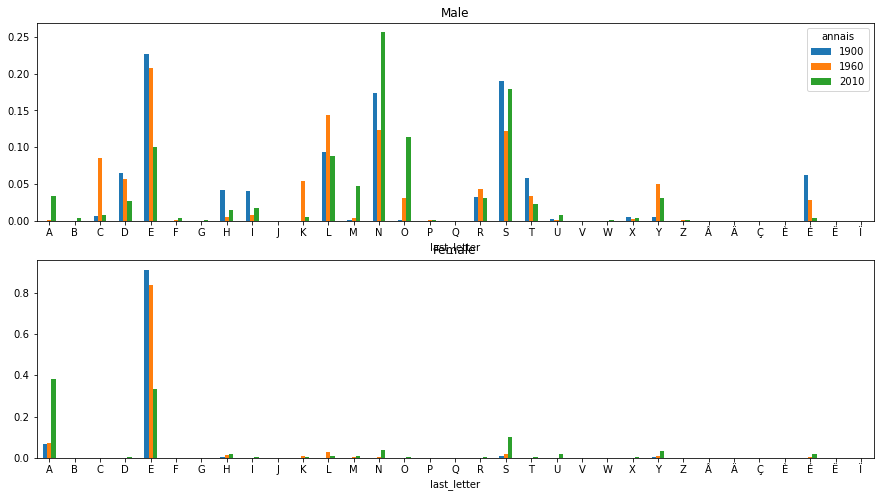

In [33]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(15, 8))
letter_prop[1].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop[2].plot(kind='bar', rot=0, ax=axes[1], title='Female', legend=False)


In [42]:
import re 
#utilisable en dehors de pandas
#findal trouve toute les occurences ...


# We already used Regex for matching 3 digits strings :
# map_df[map_df.code_insee.str.contains("\d\d\d")]

string  = "cette chaine ne contient pas de série de 03 chiffres"


matches=re.findall("\d\d\d",string)
matches

[]

In [46]:
string2 = "cette chaine contient une série de 003 chiffres "

matches=re.findall("\d\d\d",string2)
matches
string3 = "cette chaine contient 002 séries de 003 chiffres "

matches=re.findall("\d\d\d",string3)
matches


['002', '003']

In [47]:
#---------------------------
# CHERCHER REMPLACER
# re.sub(pattern, repl, string, max=0)
newstring=re.sub("\d\d\d","xxx",string3)
newstring


'cette chaine contient xxx séries de xxx chiffres '

In [48]:
#----------------------------
# On peut aussi réutiliser les sous-chaines matchées en utilisant les parenthèses
# r"" est une RAW string. ça permet de ne pas avoir a échapper les caractères spéciaux
newstring=re.sub("\d\d(\d)",r"\1",string3)
newstring
# On cherche 3 chiffres et on garde le dernier

'cette chaine contient 2 séries de 3 chiffres '

In [52]:
# Chaque partie de la regexp entre parenthèses matchée peut être réutilisée avec \1 \2 \3 etc..
# r"" python raw strings. 

newstring=re.sub("(\d)(\d)(\d)",r"\3\2\1",string3)
newstring

#On cherche 3 chiffres et on remplace la position


['002', '003']

In [53]:
#Possible -> \d* 0 ou plus
#Possible -> \d+ 1 ou plus

string3 = "cette chaine contient 002 séries de 003 chiffres "

matches=re.findall("\d+",string3)
matches

# match tous les blocs de 1 ou + chiffres


['002', '003']

In [50]:
# On peut aussi réutiliser les sous-chaines matchées en utilisant les parenthèses
# r"" est une RAW string. ça permet de ne pas avoir a échapper les caractères spéciaux
newstring=re.sub("(\d\d\d)",r"#\1",string3)
newstring



'cette chaine contient #002 séries de #003 chiffres '

In [54]:
# symbole . ça match n'importe quelle caractère sauf un saut de signe, l'opérateur * juste après le caractère qu'on veut matcher

# Attention, par défaut le caractère * est "greedy", il englobe tout ce qu'il peut
string4="le début est avant la fin"
newstring=re.findall("d.*t",string4)
newstring


['début est avant']

In [55]:
# Je peux rendre * "lazy" avec ?
newstring=re.findall("d.*?t",string4)
newstring


['début']

### WEBScraping

In [56]:
#!pip install requests
#plus de probleme sur docker sinon

import requests as req         # module de requête http
url="https://www.laboiteverte.fr/"
page = req.request('get', url) # on récupère une page 
html = page.text              # on récupère le contenu html de la page dans un string

#sinon docker
#docker run -v C:\DOSSIERNOTEBOOK:/home/jovyan/work -p 32800:8888 -e JUPYTER_ENABLE_LAB=yes jupyter/minimal-notebook:latest


In [57]:
html

'<!DOCTYPE html>\n<html lang="fr-FR">\n<head>\n<meta charset="UTF-8">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<script src="/cdn-cgi/apps/head/0agGRwNEyRKP1HgMn3__FqQ_YLU.js"></script><link rel="profile" href="https://gmpg.org/xfn/11">\n<link rel="pingback" href="https://www.laboiteverte.fr/xmlrpc.php">\n<meta property="fb:pages" content="323359661529" />\n\n<title>La boite verte : Site de découverte sur la photographie, la science, les arts et tout ce qui est insolite.</title>\n<meta name="description" content="Une boite verte qui me sert à ranger des trucs sur la photographie, le design, la technologie, des vidéos, des artistes et des plein de choses insolites." />\n<meta name="robots" content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" />\n<link rel="canonical" href="https://www.laboiteverte.fr/" />\n<link rel="next" href="https://www.laboiteverte.fr/page/2/" />\n<meta property="og:locale" content="fr_FR" />\n<meta pro

In [58]:
type(html)

str

In [61]:
# c'est bien du texte, on peut appliquer les regexps.
# un lien html : 
# <a href="http://www.google.fr"> moteur de recherche </a>
# Récupérons tous les liens :

liens= re.findall("<a.*/a>",html)
liens


#un lien en html -> <a.*/a>

# le . prend pas les sauts de lignes -> donc les liens sur plusieurs lignes ne sont pas recup (ne sont pas match)

['<a class="skip-link screen-reader-text" href="#content">Aller au contenu</a>',
 '<a class="header-entry-logo" href="https://www.laboiteverte.fr/" rel="home"></a>',
 '<a href="https://www.laboiteverte.fr/" rel="home">La boite verte</a>',
 '<a href="https://www.laboiteverte.fr/category/art/">Arts</a>',
 '<a href="https://www.laboiteverte.fr/category/art/photographie/">Photographie</a>',
 '<a href="https://www.laboiteverte.fr/category/divers/">Divers</a>',
 '<a href="https://www.laboiteverte.fr/category/savoir/">Savoir</a>',
 '<a href="https://www.laboiteverte.fr/category/tech-sci/">Techno / Science</a>',
 '<a href="#">Recherche</a>',
 '<a class="page-numbers" href="https://www.laboiteverte.fr/page/2/">2</a>',
 '<a class="page-numbers" href="https://www.laboiteverte.fr/page/3/">3</a>',
 '<a class="page-numbers" href="https://www.laboiteverte.fr/page/285/">285</a>',
 '<a class="next page-numbers" href="https://www.laboiteverte.fr/page/2/">></a>',
 '<a href="/category/featured/"><div clas

In [62]:
len(liens)
#25 liens
#trouver un lien interne # trouver un lien cible vers le meme site

25

In [63]:
# trouver les liens internes
[x for x in liens if re.findall(r"laboiteverte.fr",x)]+[x for x in liens if re.findall('href="/',x)]


['<a class="header-entry-logo" href="https://www.laboiteverte.fr/" rel="home"></a>',
 '<a href="https://www.laboiteverte.fr/" rel="home">La boite verte</a>',
 '<a href="https://www.laboiteverte.fr/category/art/">Arts</a>',
 '<a href="https://www.laboiteverte.fr/category/art/photographie/">Photographie</a>',
 '<a href="https://www.laboiteverte.fr/category/divers/">Divers</a>',
 '<a href="https://www.laboiteverte.fr/category/savoir/">Savoir</a>',
 '<a href="https://www.laboiteverte.fr/category/tech-sci/">Techno / Science</a>',
 '<a class="page-numbers" href="https://www.laboiteverte.fr/page/2/">2</a>',
 '<a class="page-numbers" href="https://www.laboiteverte.fr/page/3/">3</a>',
 '<a class="page-numbers" href="https://www.laboiteverte.fr/page/285/">285</a>',
 '<a class="next page-numbers" href="https://www.laboiteverte.fr/page/2/">></a>',
 '<a href="/category/featured/"><div class="footer-link"><i class="icon-star-outline"></i><div class="footer-link-txt">Best-Of</div></div></a>',
 '<a hr

In [65]:
#lien avec # pointe sur des endroits sur la meme page


# trouver les liens exterieurs
liste1=[ _ for _ in liens if not re.findall(r"laboiteverte.fr",_)]
liste2=[ _ for _ in liste1 if not re.findall(r'href="/',_) ]

liste2


['<a class="skip-link screen-reader-text" href="#content">Aller au contenu</a>',
 '<a href="#">Recherche</a>',
 '<a rel="nofollow" target="_blank" href="https://plus.google.com/+laboiteverte/"><i class="icon-googleplus gg"></i></a>',
 '<a rel="nofollow" target="_blank" href="https://twitter.com/LaBoiteVerte"><i class="icon-twitter tw"></i></a>',
 '<a rel="nofollow" target="_blank" href="https://www.facebook.com/LaBoiteVerte"><i class="icon-facebook fb"></i></a>',
 '<a rel="nofollow" target="_blank" href="http://laboiteverte.tumblr.com/"><i class="icon-tumblr tu"></i></a>']

In [66]:
liste3 =[ _ for _ in liste2 if not re.findall(r'href="#',_) ]

liste3


['<a rel="nofollow" target="_blank" href="https://plus.google.com/+laboiteverte/"><i class="icon-googleplus gg"></i></a>',
 '<a rel="nofollow" target="_blank" href="https://twitter.com/LaBoiteVerte"><i class="icon-twitter tw"></i></a>',
 '<a rel="nofollow" target="_blank" href="https://www.facebook.com/LaBoiteVerte"><i class="icon-facebook fb"></i></a>',
 '<a rel="nofollow" target="_blank" href="http://laboiteverte.tumblr.com/"><i class="icon-tumblr tu"></i></a>']

In [70]:
!pip install bs4

In [72]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html)
#https://www.w3schools.com/cssref/css_selectors.asp

#css du web, on decrit la page en html et css pour le style pour tout les liens, tout les images -> feuille de style



In [75]:
selector = "a"
#norme css pour les liens
bsliens    = soup.find_all(selector)
len(bsliens)



74

In [76]:
len(liens), len(bsliens)
#c'est que beautifulsoup capable de trouver les liens multilignes

(25, 74)

In [77]:
#rajout d'une constante
liens= re.findall("<a.*?/a>",html,re.DOTALL)
len(liens), len(bsliens)



(74, 74)

In [78]:
#selecteur image pour selectionner toutes les images

selector = "img"
imgs    = soup.find_all(selector)
len(imgs)


48

In [79]:
type(imgs)

bs4.element.ResultSet

In [80]:
imgs[0]['src']


'https://www.laboiteverte.fr/wp-content/uploads/2013/07/eigengrau-720x5851.png'

In [82]:
selector = "img"
imgs    = soup.find_all(selector)
len(imgs)
imgs[0]['src']
img_src= [img['src'] for img in imgs]
img_src


['https://www.laboiteverte.fr/wp-content/uploads/2013/07/eigengrau-720x5851.png',
 'https://www.laboiteverte.fr/wp-content/uploads/2015/09/arbre-timide-feuillage-01-464x261.jpg',
 'https://www.laboiteverte.fr/wp-content/uploads/2014/12/Tao-Liu-photographie-rue-chine-01-464x261.jpg',
 'https://www.laboiteverte.fr/wp-content/uploads/2020/09/Screenshot_6-480x320.png',
 'https://www.laboiteverte.fr/wp-content/uploads/2020/09/mineralogie-exploration-01-480x320.jpg',
 'https://www.laboiteverte.fr/wp-content/uploads/2020/09/Screenshot_5-480x320.png',
 'https://www.laboiteverte.fr/wp-content/uploads/2020/08/escalier-arc-01-480x320.jpg',
 'https://www.laboiteverte.fr/wp-content/uploads/2020/08/maisons-oubli-01-480x320.jpg',
 'https://www.laboiteverte.fr/wp-content/uploads/2020/08/ghibli-decoupe-02-480x320.jpg',
 'https://www.laboiteverte.fr/wp-content/uploads/2020/08/anses-01-480x320.jpg',
 'https://www.laboiteverte.fr/wp-content/uploads/2020/08/sign-of-times-01-480x320.png',
 'https://www.labo

In [83]:
#sur safari -> prefère et activé de devoplement 
#Ou F12 ou inspect -> ou click droti sur un element pour trouver la class

img_src= [img['src'] for img in imgs]
img_src
selector = "entry-content"
nodes    = soup.find_all(class_=selector) # class is a python reserved keyword, that's why the name of the param is class_
len(nodes)


47

In [87]:
selector = "entry-title"
nodes    = soup.find_all(class_=selector) # class is a python reserved keyword, that's why the name of the param is class_
len(nodes)



47

In [88]:
nodes


[<span class="entry-title">L’eigengrau : la couleur de l’absence de lumière</span>,
 <span class="entry-title">La timidité des arbres</span>,
 <span class="entry-title">La rue chinoise de Tao Liu</span>,
 <span class="entry-title">Patience et splendeurs chez une papetière</span>,
 <span class="entry-title">2242 illustrations minéralogiques à explorer en HD (et le making of)</span>,
 <span class="entry-title">Un orgue électronique très « chouette »</span>,
 <span class="entry-title">Elles ont tué le game de l’escalier arc en ciel</span>,
 <span class="entry-title">387 petites maisons presque oubliées</span>,
 <span class="entry-title">Ghibli en papier délicatement peint et découpé</span>,
 <span class="entry-title">La guerre de cent anses</span>,
 <span class="entry-title">« Signe des temps, temps du signe » par Hanne Darboven et Ruth Wolf-Rehfeldt</span>,
 <span class="entry-title">La faune et la flore rhabillées par Bill Meyer</span>,
 <span class="entry-title">The Masked Series par I

In [89]:
selector = "entry-content"
nodes    = soup.find_all(class_=selector) # class is a python reserved keyword, that's why the name of the param is class_
len(nodes)

47

In [90]:
nodes

[<div class="entry-content">
 <img alt="" class="attachment-tb-wl size-tb-wl wp-post-image" data-attachment-id="25479" data-comments-opened="1" data-image-description="" data-image-meta='{"aperture":"0","credit":"","camera":"","caption":"","created_timestamp":"0","copyright":"","focal_length":"0","iso":"0","shutter_speed":"0","title":"","orientation":"0"}' data-image-title="" data-large-file="https://www.laboiteverte.fr/wp-content/uploads/2013/07/eigengrau-720x5851.png" data-medium-file="https://www.laboiteverte.fr/wp-content/uploads/2013/07/eigengrau-720x5851-591x480.png" data-orig-file="https://www.laboiteverte.fr/wp-content/uploads/2013/07/eigengrau-720x5851.png" data-orig-size="720,585" data-permalink="https://www.laboiteverte.fr/leigengrau/attachment/25479/" height="513" loading="lazy" sizes="(max-width: 631px) 100vw, 631px" src="https://www.laboiteverte.fr/wp-content/uploads/2013/07/eigengrau-720x5851.png" srcset="https://www.laboiteverte.fr/wp-content/uploads/2013/07/eigengrau-7

In [93]:
len(nodes)




47

In [94]:
type(nodes)


bs4.element.ResultSet

In [95]:
nodes[0].text

'\n '

In [96]:
nodes[0].parent

<a class="post-a-box" href="https://www.laboiteverte.fr/leigengrau/">
<div class="entry-content">
<img alt="" class="attachment-tb-wl size-tb-wl wp-post-image" data-attachment-id="25479" data-comments-opened="1" data-image-description="" data-image-meta='{"aperture":"0","credit":"","camera":"","caption":"","created_timestamp":"0","copyright":"","focal_length":"0","iso":"0","shutter_speed":"0","title":"","orientation":"0"}' data-image-title="" data-large-file="https://www.laboiteverte.fr/wp-content/uploads/2013/07/eigengrau-720x5851.png" data-medium-file="https://www.laboiteverte.fr/wp-content/uploads/2013/07/eigengrau-720x5851-591x480.png" data-orig-file="https://www.laboiteverte.fr/wp-content/uploads/2013/07/eigengrau-720x5851.png" data-orig-size="720,585" data-permalink="https://www.laboiteverte.fr/leigengrau/attachment/25479/" height="513" loading="lazy" sizes="(max-width: 631px) 100vw, 631px" src="https://www.laboiteverte.fr/wp-content/uploads/2013/07/eigengrau-720x5851.png" srcset

In [97]:
for child in nodes[0].children:
    try:
        print(child)
    except Exception as e:
        pass




<img alt="" class="attachment-tb-wl size-tb-wl wp-post-image" data-attachment-id="25479" data-comments-opened="1" data-image-description="" data-image-meta='{"aperture":"0","credit":"","camera":"","caption":"","created_timestamp":"0","copyright":"","focal_length":"0","iso":"0","shutter_speed":"0","title":"","orientation":"0"}' data-image-title="" data-large-file="https://www.laboiteverte.fr/wp-content/uploads/2013/07/eigengrau-720x5851.png" data-medium-file="https://www.laboiteverte.fr/wp-content/uploads/2013/07/eigengrau-720x5851-591x480.png" data-orig-file="https://www.laboiteverte.fr/wp-content/uploads/2013/07/eigengrau-720x5851.png" data-orig-size="720,585" data-permalink="https://www.laboiteverte.fr/leigengrau/attachment/25479/" height="513" loading="lazy" sizes="(max-width: 631px) 100vw, 631px" src="https://www.laboiteverte.fr/wp-content/uploads/2013/07/eigengrau-720x5851.png" srcset="https://www.laboiteverte.fr/wp-content/uploads/2013/07/eigengrau-720x5851.png 720w, https://ww

In [ ]:
#rappel html, structure classique d'une html
#<html>
    <head>
    >/head>
    <body>
    </body>
</html>

In [98]:
body=soup.body
for child in body.children:
    try:
        print(child)
        print("-" * 20)
    except Exception as e:
        pass


<div id="fb-root"></div>
--------------------


--------------------
<script>(function(d, s, id) {
  var js, fjs = d.getElementsByTagName(s)[0];
  if (d.getElementById(id)) return;
  js = d.createElement(s); js.id = id;
  js.src = "//connect.facebook.net/fr_FR/sdk.js#xfbml=1&version=v2.6&appId=450562218296858";
  fjs.parentNode.insertBefore(js, fjs);
}(document, 'script', 'facebook-jssdk'));</script>
--------------------


--------------------
<div class="site" id="page">
<a class="skip-link screen-reader-text" href="#content">Aller au contenu</a>
<header class="site-header" id="masthead" role="banner">
<div class="site-branding">
<div class="header-menu-ico"></div>
<a class="header-entry-logo" href="https://www.laboiteverte.fr/" rel="home"></a>
<h1 class="site-title"><a href="https://www.laboiteverte.fr/" rel="home">La boite verte</a></h1>
<div class="header-search-ico"></div>
</div>
<nav class="main-navigation" id="site-navigation" role="navigation">
<ul class="menu" id="primary-menu

In [101]:
#https://www.infoclimat.fr/observations-meteo/archives/7/septembre/2019/paris-montsouris/07156.html
#scrapper

url   = "https://www.infoclimat.fr/observations-meteo/archives/7/septembre/2019/paris-montsouris/07156.html"
page  = req.request("get", url )
html  = page.text
soup  = BeautifulSoup(html)
html

'<!DOCTYPE html>\n<html>\n\n<head>\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=yes, minimum-scale=0.25"/>\n    <link rel="stylesheet" href="/styles_src/materialize.css?v2.css">\n    <link href="https://fonts.googleapis.com/icon?family=Material+Icons" rel="stylesheet">\n\n    <!--BENCH_start = (9.5367431640625E-7, 1.9073486328125E-6) -->\n<meta name="description" content="Infoclimat, la m&eacute;t&eacute;o en France en temps r&eacute;el - Weather in realtime Europe, Canada" /><meta name="keywords" content="infoclimat, meteo en direct, france, europe, live, observation meteo, climatologie, gfs, ukmo, wrf, meteo, temps, reel, climat, information, modeles, previsions, association, weather, realtime, europe, temperatures, wind, wetter, weather" /><meta http-equiv="Content-Type" content="text/html; charset=utf-8" /><meta name="apple-itunes-app" content="app-id=901314430" /><meta http-equiv="X-UA-Compatible" content="chrome=1, IE=edge"><title>Paris

In [100]:
import webbrowser
import os
os.getcwd()


with open("meteo.html", "a", encoding="utf8") as f:
    f.writelines(html)

webbrowser.open(os.getcwd()+"meteo.html") 

#https://pythonexamples.org/python-open-url-in-chrome-browser/
#ouvrir chrome

True

In [102]:

#table -> table -> body corps-> tir -> th 
# > acceder à des parents/ -> enfants
# pour matcher toutes les lignes du tableau  ( <tr></tr>): 
selector = '#resptable-releves > tbody > tr'
table_row    = soup.select(selector)
table_row



[<tr>
 <!-- heure -->
 <th style="font-size:1.25em">
 <span class="tipsy-trigger" title="Heure réelle d'émission :&lt;br /&gt;07/09/2019&lt;br /&gt;&lt;b&gt;23h00 UTC&lt;/b&gt;">01h</span> </th>
 <!-- plus -->
 <td style="padding:2px 4px">
 <a href="/stations-meteo/image_mf.php?id=07156&amp;dh=2019-09-07 23:00:00&amp;token=a83b34d873692398316cbfed7acdd606" target="_blank"><i class="material-icons">add_circle_outline</i></a>
 </td>
 <td style="/*background-color:rgba(0,0,0,0.1)*/"><span class="tipsy-trigger" style="font-weight:bold;display:inline-block;font-size:16px" title="&lt;div&gt;Minimale sur 1h : 13.9°C à 22:53 UTC&lt;/div&gt;&lt;div&gt;Maximale sur 1h : 14.3°C à 22:01 UTC&lt;/div&gt;">13.9</span> <span class="tab-units-v">°C</span><span class="color-heatmap" style="background-color:rgb(245,255,25)"></span> <div style="font-size:9px; margin-bottom: -8px">
 <span style="color:#081dbb">13.9</span> → <span style="color:#841910">14.3</span>
 </div></td><td>0 <span class="tab-units-v"

In [103]:
len(table_row)
#24h

24

In [104]:
#le n eme child de nth-child(1) ligne 1 > td:ntg-cild(3) 3 EME OLONNE 6> ELEMENT SPAN;TIPSY6TRIGGER
#CHERCHER LA TEMPERATURE dans le tableau ligne 1 colonne 3 seul dans le span -> 13.9
# Pour matcher une cellule située à une ligne et colonne spécifique du tableau :

selector="#resptable-releves > tbody > tr:nth-child(1) > td:nth-child(3) > span.tipsy-trigger"
soup.select(selector)[0].text



'13.9'

In [105]:
# Toutes les cellules du tableau :

for ligne in range(len(table_row)+1):
    print("=" * 10)
    print( f"ligne :{ligne}" )
    for col in range(1,10): # il y a 10 colonnes a scraper
        print("-" * 10 )
        try:
            print(f"ligne : {ligne} colonne : {col}" )
            selector=f"#resptable-releves > tbody > tr:nth-child({ligne}) > td:nth-child({col}) "
            print(selector)
            print(soup.select(selector)[0].text)
        except Exception as e:
            print(e)


ligne :0
----------
ligne : 0 colonne : 1
#resptable-releves > tbody > tr:nth-child(0) > td:nth-child(1) 
list index out of range
----------
ligne : 0 colonne : 2
#resptable-releves > tbody > tr:nth-child(0) > td:nth-child(2) 
list index out of range
----------
ligne : 0 colonne : 3
#resptable-releves > tbody > tr:nth-child(0) > td:nth-child(3) 
list index out of range
----------
ligne : 0 colonne : 4
#resptable-releves > tbody > tr:nth-child(0) > td:nth-child(4) 
list index out of range
----------
ligne : 0 colonne : 5
#resptable-releves > tbody > tr:nth-child(0) > td:nth-child(5) 
list index out of range
----------
ligne : 0 colonne : 6
#resptable-releves > tbody > tr:nth-child(0) > td:nth-child(6) 
list index out of range
----------
ligne : 0 colonne : 7
#resptable-releves > tbody > tr:nth-child(0) > td:nth-child(7) 
list index out of range
----------
ligne : 0 colonne : 8
#resptable-releves > tbody > tr:nth-child(0) > td:nth-child(8) 
list index out of range
----------
ligne : 0 co

7.5 °C
----------
ligne : 8 colonne : 9
#resptable-releves > tbody > tr:nth-child(8) > td:nth-child(9) 
1021.0hPa
ligne :9
----------
ligne : 9 colonne : 1
#resptable-releves > tbody > tr:nth-child(9) > td:nth-child(1) 
list index out of range
----------
ligne : 9 colonne : 2
#resptable-releves > tbody > tr:nth-child(9) > td:nth-child(2) 

add_circle_outline

----------
ligne : 9 colonne : 3
#resptable-releves > tbody > tr:nth-child(9) > td:nth-child(3) 
18.3 °C 
18.1 → 18.7

----------
ligne : 9 colonne : 4
#resptable-releves > tbody > tr:nth-child(9) > td:nth-child(4) 
0 mm/1h
----------
ligne : 9 colonne : 5
#resptable-releves > tbody > tr:nth-child(9) > td:nth-child(5) 
14 km/hraf.34.6 

----------
ligne : 9 colonne : 6
#resptable-releves > tbody > tr:nth-child(9) > td:nth-child(6) 
49%
----------
ligne : 9 colonne : 7
#resptable-releves > tbody > tr:nth-child(9) > td:nth-child(7) 
311 
----------
ligne : 9 colonne : 8
#resptable-releves > tbody > tr:nth-child(9) > td:nth-child(8) 

7 km/hraf.24.5 

----------
ligne : 17 colonne : 6
#resptable-releves > tbody > tr:nth-child(17) > td:nth-child(6) 
84%
----------
ligne : 17 colonne : 7
#resptable-releves > tbody > tr:nth-child(17) > td:nth-child(7) 

----------
ligne : 17 colonne : 8
#resptable-releves > tbody > tr:nth-child(17) > td:nth-child(8) 
12.2 °C
----------
ligne : 17 colonne : 9
#resptable-releves > tbody > tr:nth-child(17) > td:nth-child(9) 
1020.6hPa
ligne :18
----------
ligne : 18 colonne : 1
#resptable-releves > tbody > tr:nth-child(18) > td:nth-child(1) 
list index out of range
----------
ligne : 18 colonne : 2
#resptable-releves > tbody > tr:nth-child(18) > td:nth-child(2) 

add_circle_outline

----------
ligne : 18 colonne : 3
#resptable-releves > tbody > tr:nth-child(18) > td:nth-child(3) 
14.3 °C 
14.1 → 14.3

----------
ligne : 18 colonne : 4
#resptable-releves > tbody > tr:nth-child(18) > td:nth-child(4) 
0 mm/1h
----------
ligne : 18 colonne : 5
#resptable-releves > tbody > tr:nth-child(18) > t

In [106]:
# on affine en ajoutant le span

for ligne in range(len(table_row)+1):
    print("=" * 10)
    print( f"ligne :{ligne}" )
    for col in range(1,10): # il y a 10 colonnes a scraper
        print("-" * 10 )
        try:
            print(f"ligne : {ligne} colonne : {col}" )
            selector=f"#resptable-releves > tbody > tr:nth-child({ligne}) > td:nth-child({col}) > span.tipsy-trigger"
            print(selector)
            print(soup.select(selector)[0].text)
        except Exception as e:
            print(e)

#on a pas l'humidité car le span n'est plus dans tipsy-trigger

ligne :0
----------
ligne : 0 colonne : 1
#resptable-releves > tbody > tr:nth-child(0) > td:nth-child(1) > span.tipsy-trigger
list index out of range
----------
ligne : 0 colonne : 2
#resptable-releves > tbody > tr:nth-child(0) > td:nth-child(2) > span.tipsy-trigger
list index out of range
----------
ligne : 0 colonne : 3
#resptable-releves > tbody > tr:nth-child(0) > td:nth-child(3) > span.tipsy-trigger
list index out of range
----------
ligne : 0 colonne : 4
#resptable-releves > tbody > tr:nth-child(0) > td:nth-child(4) > span.tipsy-trigger
list index out of range
----------
ligne : 0 colonne : 5
#resptable-releves > tbody > tr:nth-child(0) > td:nth-child(5) > span.tipsy-trigger
list index out of range
----------
ligne : 0 colonne : 6
#resptable-releves > tbody > tr:nth-child(0) > td:nth-child(6) > span.tipsy-trigger
list index out of range
----------
ligne : 0 colonne : 7
#resptable-releves > tbody > tr:nth-child(0) > td:nth-child(7) > span.tipsy-trigger
list index out of range
----

list index out of range
----------
ligne : 6 colonne : 9
#resptable-releves > tbody > tr:nth-child(6) > td:nth-child(9) > span.tipsy-trigger
list index out of range
ligne :7
----------
ligne : 7 colonne : 1
#resptable-releves > tbody > tr:nth-child(7) > td:nth-child(1) > span.tipsy-trigger
list index out of range
----------
ligne : 7 colonne : 2
#resptable-releves > tbody > tr:nth-child(7) > td:nth-child(2) > span.tipsy-trigger
list index out of range
----------
ligne : 7 colonne : 3
#resptable-releves > tbody > tr:nth-child(7) > td:nth-child(3) > span.tipsy-trigger
17.7
----------
ligne : 7 colonne : 4
#resptable-releves > tbody > tr:nth-child(7) > td:nth-child(4) > span.tipsy-trigger
list index out of range
----------
ligne : 7 colonne : 5
#resptable-releves > tbody > tr:nth-child(7) > td:nth-child(5) > span.tipsy-trigger
raf.37.8
----------
ligne : 7 colonne : 6
#resptable-releves > tbody > tr:nth-child(7) > td:nth-child(6) > span.tipsy-trigger
list index out of range
----------
lig

raf.25.2
----------
ligne : 14 colonne : 6
#resptable-releves > tbody > tr:nth-child(14) > td:nth-child(6) > span.tipsy-trigger
list index out of range
----------
ligne : 14 colonne : 7
#resptable-releves > tbody > tr:nth-child(14) > td:nth-child(7) > span.tipsy-trigger
list index out of range
----------
ligne : 14 colonne : 8
#resptable-releves > tbody > tr:nth-child(14) > td:nth-child(8) > span.tipsy-trigger
list index out of range
----------
ligne : 14 colonne : 9
#resptable-releves > tbody > tr:nth-child(14) > td:nth-child(9) > span.tipsy-trigger
list index out of range
ligne :15
----------
ligne : 15 colonne : 1
#resptable-releves > tbody > tr:nth-child(15) > td:nth-child(1) > span.tipsy-trigger
list index out of range
----------
ligne : 15 colonne : 2
#resptable-releves > tbody > tr:nth-child(15) > td:nth-child(2) > span.tipsy-trigger
list index out of range
----------
ligne : 15 colonne : 3
#resptable-releves > tbody > tr:nth-child(15) > td:nth-child(3) > span.tipsy-trigger
16.0

list index out of range
ligne :22
----------
ligne : 22 colonne : 1
#resptable-releves > tbody > tr:nth-child(22) > td:nth-child(1) > span.tipsy-trigger
list index out of range
----------
ligne : 22 colonne : 2
#resptable-releves > tbody > tr:nth-child(22) > td:nth-child(2) > span.tipsy-trigger
list index out of range
----------
ligne : 22 colonne : 3
#resptable-releves > tbody > tr:nth-child(22) > td:nth-child(3) > span.tipsy-trigger
14.6
----------
ligne : 22 colonne : 4
#resptable-releves > tbody > tr:nth-child(22) > td:nth-child(4) > span.tipsy-trigger
list index out of range
----------
ligne : 22 colonne : 5
#resptable-releves > tbody > tr:nth-child(22) > td:nth-child(5) > span.tipsy-trigger
raf.21.6
----------
ligne : 22 colonne : 6
#resptable-releves > tbody > tr:nth-child(22) > td:nth-child(6) > span.tipsy-trigger
list index out of range
----------
ligne : 22 colonne : 7
#resptable-releves > tbody > tr:nth-child(22) > td:nth-child(7) > span.tipsy-trigger
list index out of range

In [107]:
# on affine en ajoutant le span

for ligne in range(len(table_row)+1):
    print("=" * 10)
    print( f"ligne :{ligne}" )
    for col in range(1,10): # il y a 10 colonnes a scraper
        print("-" * 10 )
        try:
            print(f"ligne : {ligne} colonne : {col}" )
            selector=f"#resptable-releves > tbody > tr:nth-child({ligne}) > td:nth-child({col}) > span"
            print(selector)
            print(soup.select(selector)[0].text)
        except Exception as e:
            print(e)

#on a pas l'humidité car le span n'est plus dans tipsy-trigger

ligne :0
----------
ligne : 0 colonne : 1
#resptable-releves > tbody > tr:nth-child(0) > td:nth-child(1) > span
list index out of range
----------
ligne : 0 colonne : 2
#resptable-releves > tbody > tr:nth-child(0) > td:nth-child(2) > span
list index out of range
----------
ligne : 0 colonne : 3
#resptable-releves > tbody > tr:nth-child(0) > td:nth-child(3) > span
list index out of range
----------
ligne : 0 colonne : 4
#resptable-releves > tbody > tr:nth-child(0) > td:nth-child(4) > span
list index out of range
----------
ligne : 0 colonne : 5
#resptable-releves > tbody > tr:nth-child(0) > td:nth-child(5) > span
list index out of range
----------
ligne : 0 colonne : 6
#resptable-releves > tbody > tr:nth-child(0) > td:nth-child(6) > span
list index out of range
----------
ligne : 0 colonne : 7
#resptable-releves > tbody > tr:nth-child(0) > td:nth-child(7) > span
list index out of range
----------
ligne : 0 colonne : 8
#resptable-releves > tbody > tr:nth-child(0) > td:nth-child(8) > span

list index out of range
----------
ligne : 7 colonne : 8
#resptable-releves > tbody > tr:nth-child(7) > td:nth-child(8) > span
7.4
----------
ligne : 7 colonne : 9
#resptable-releves > tbody > tr:nth-child(7) > td:nth-child(9) > span
hPa
ligne :8
----------
ligne : 8 colonne : 1
#resptable-releves > tbody > tr:nth-child(8) > td:nth-child(1) > span
list index out of range
----------
ligne : 8 colonne : 2
#resptable-releves > tbody > tr:nth-child(8) > td:nth-child(2) > span
list index out of range
----------
ligne : 8 colonne : 3
#resptable-releves > tbody > tr:nth-child(8) > td:nth-child(3) > span
17.8
----------
ligne : 8 colonne : 4
#resptable-releves > tbody > tr:nth-child(8) > td:nth-child(4) > span
mm/1h
----------
ligne : 8 colonne : 5
#resptable-releves > tbody > tr:nth-child(8) > td:nth-child(5) > span
18
----------
ligne : 8 colonne : 6
#resptable-releves > tbody > tr:nth-child(8) > td:nth-child(6) > span
51
----------
ligne : 8 colonne : 7
#resptable-releves > tbody > tr:nth-c

11.8
----------
ligne : 15 colonne : 9
#resptable-releves > tbody > tr:nth-child(15) > td:nth-child(9) > span
hPa
ligne :16
----------
ligne : 16 colonne : 1
#resptable-releves > tbody > tr:nth-child(16) > td:nth-child(1) > span
list index out of range
----------
ligne : 16 colonne : 2
#resptable-releves > tbody > tr:nth-child(16) > td:nth-child(2) > span
list index out of range
----------
ligne : 16 colonne : 3
#resptable-releves > tbody > tr:nth-child(16) > td:nth-child(3) > span
15.6
----------
ligne : 16 colonne : 4
#resptable-releves > tbody > tr:nth-child(16) > td:nth-child(4) > span
mm/1h
----------
ligne : 16 colonne : 5
#resptable-releves > tbody > tr:nth-child(16) > td:nth-child(5) > span
7
----------
ligne : 16 colonne : 6
#resptable-releves > tbody > tr:nth-child(16) > td:nth-child(6) > span
81
----------
ligne : 16 colonne : 7
#resptable-releves > tbody > tr:nth-child(16) > td:nth-child(7) > span
list index out of range
----------
ligne : 16 colonne : 8
#resptable-releves 

11
----------
ligne : 23 colonne : 9
#resptable-releves > tbody > tr:nth-child(23) > td:nth-child(9) > span
hPa
ligne :24
----------
ligne : 24 colonne : 1
#resptable-releves > tbody > tr:nth-child(24) > td:nth-child(1) > span
list index out of range
----------
ligne : 24 colonne : 2
#resptable-releves > tbody > tr:nth-child(24) > td:nth-child(2) > span
list index out of range
----------
ligne : 24 colonne : 3
#resptable-releves > tbody > tr:nth-child(24) > td:nth-child(3) > span
15.8
----------
ligne : 24 colonne : 4
#resptable-releves > tbody > tr:nth-child(24) > td:nth-child(4) > span
mm/1h
----------
ligne : 24 colonne : 5
#resptable-releves > tbody > tr:nth-child(24) > td:nth-child(5) > span
14
----------
ligne : 24 colonne : 6
#resptable-releves > tbody > tr:nth-child(24) > td:nth-child(6) > span
69
----------
ligne : 24 colonne : 7
#resptable-releves > tbody > tr:nth-child(24) > td:nth-child(7) > span
list index out of range
----------
ligne : 24 colonne : 8
#resptable-releves >

In [109]:
# on retire l'affichage et on met le tout dans un DF
import pandas as pd
df=pd.DataFrame()

for ligne in range(1,len(table_row)+1):
    values=[]
    for col in range(1,11): # il y a 10 colonnes a scraper
        selector=f"#resptable-releves > tbody > tr:nth-child({ligne}) > td:nth-child({col})"
        try:
                values.append(soup.select(selector)[0].text)
        except Exception as e:
            values.append("")
    df[ligne]=values

df



,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
0,,,,,,,,,,,...,,,,,,,,,,
1,\nadd_circle_outline\n,\nadd_circle_outline\n,\nadd_circle_outline\n,\nadd_circle_outline\n,\nadd_circle_outline\n,\nadd_circle_outline\n,\nadd_circle_outline\n,\nadd_circle_outline\n,\nadd_circle_outline\n,\nadd_circle_outline\n,...,\nadd_circle_outline\n,\nadd_circle_outline\n,\nadd_circle_outline\n,\nadd_circle_outline\n,\nadd_circle_outline\n,\nadd_circle_outline\n,\nadd_circle_outline\n,\nadd_circle_outline\n,\nadd_circle_outline\n,\nadd_circle_outline\n
2,13.9 °C \n13.9 → 14.3\n,14.3 °C \n14.3 → 14.9\n,14.9 °C \n14.7 → 14.9\n,14.8 °C \n14.8 → 15.4\n,15.4 °C \n15.4 → 16.8\n,16.8 °C \n16.8 → 17.8\n,17.7 °C \n17.6 → 18.2\n,17.8 °C \n17.7 → 18.3\n,18.3 °C \n18.1 → 18.7\n,18.3 °C \n17.9 → 19\n,...,16.0 °C \n15.6 → 16.4\n,15.6 °C \n14.9 → 15.6\n,14.9 °C \n14.3 → 14.9\n,14.3 °C \n14.1 → 14.3\n,14.4 °C \n14.4 → 14.8\n,14.8 °C \n14.7 → 14.8\n,14.7 °C \n14.6 → 14.7\n,14.6 °C \n14.6 → 15\n,15.0 °C \n15 → 15.8\n,15.8 °C \n15.8 → 16.5\n
3,0 mm/1h,0 mm/1h,0 mm/1h,0 mm/1h,0 mm/1h,0 mm/1h,0 mm/1h,0 mm/1h,0 mm/1h,0 mm/1h,...,0 mm/1h,0 mm/1h,0 mm/1h,0 mm/1h,0 mm/1h,0 mm/1h,0 mm/1h,0 mm/1h,0 mm/1h,0 mm/1h
4,14 km/hraf.32.4 \n,18 km/hraf.37.8 \n,14 km/hraf.39.6 \n,18 km/hraf.34.2 \n,14 km/hraf.45.7 \n,22 km/hraf.42.8 \n,18 km/hraf.37.8 \n,18 km/hraf.35.6 \n,14 km/hraf.34.6 \n,18 km/hraf.36.4 \n,...,11 km/hraf.24.1 \n,7 km/hraf.22.7 \n,7 km/hraf.24.5 \n,7 km/hraf.19.4 \n,7 km/hraf.24.1 \n,7 km/hraf.26.3 \n,11 km/hraf.21.2 \n,11 km/hraf.21.6 \n,11 km/hraf.26.6 \n,14 km/hraf.35.3 \n
5,76%,73%,69%,67%,62%,59%,51%,51%,49%,52%,...,76%,81%,84%,86%,85%,83%,82%,80%,77%,69%
6,,,,,,81,144,192,311,378,...,219,81,,3,,,,,,
7,9.7 °C,9.5 °C,9.3 °C,8.7 °C,8.2 °C,8.7 °C,7.4 °C,7.5 °C,7.4 °C,8.3 °C,...,11.8 °C,12.3 °C,12.2 °C,12 °C,11.9 °C,11.9 °C,11.7 °C,11.2 °C,11 °C,10.1 °C
8,1023hPa,1023.2hPa,1023.0hPa,1022.8hPa,1022.2hPa,1021.6hPa,1021.1hPa,1021.0hPa,1020.8hPa,1020.7hPa,...,1021.3hPa,1021.1hPa,1020.6hPa,1020.6hPa,1020.3hPa,1020.4hPa,1020.7hPa,1021.2hPa,1021.3hPa,1021.6hPa
9,20 km,20 km,20 km,20 km,20 km,20 km,20 km,20 km,20 km,20 km,...,20 km,20 km,20 km,20 km,20 km,20 km,20 km,20 km,20 km,20 km


In [110]:

# nous avons créé le DF colonne par colonne, mais il est plus simple d'inverser lignes et colonnes
df=df.T
df

,0,1,2,3,4,5,6,7,8,9
1,,\nadd_circle_outline\n,13.9 °C \n13.9 → 14.3\n,0 mm/1h,14 km/hraf.32.4 \n,76%,,9.7 °C,1023hPa,20 km
2,,\nadd_circle_outline\n,14.3 °C \n14.3 → 14.9\n,0 mm/1h,18 km/hraf.37.8 \n,73%,,9.5 °C,1023.2hPa,20 km
3,,\nadd_circle_outline\n,14.9 °C \n14.7 → 14.9\n,0 mm/1h,14 km/hraf.39.6 \n,69%,,9.3 °C,1023.0hPa,20 km
4,,\nadd_circle_outline\n,14.8 °C \n14.8 → 15.4\n,0 mm/1h,18 km/hraf.34.2 \n,67%,,8.7 °C,1022.8hPa,20 km
5,,\nadd_circle_outline\n,15.4 °C \n15.4 → 16.8\n,0 mm/1h,14 km/hraf.45.7 \n,62%,,8.2 °C,1022.2hPa,20 km
6,,\nadd_circle_outline\n,16.8 °C \n16.8 → 17.8\n,0 mm/1h,22 km/hraf.42.8 \n,59%,81,8.7 °C,1021.6hPa,20 km
7,,\nadd_circle_outline\n,17.7 °C \n17.6 → 18.2\n,0 mm/1h,18 km/hraf.37.8 \n,51%,144,7.4 °C,1021.1hPa,20 km
8,,\nadd_circle_outline\n,17.8 °C \n17.7 → 18.3\n,0 mm/1h,18 km/hraf.35.6 \n,51%,192,7.5 °C,1021.0hPa,20 km
9,,\nadd_circle_outline\n,18.3 °C \n18.1 → 18.7\n,0 mm/1h,14 km/hraf.34.6 \n,49%,311,7.4 °C,1020.8hPa,20 km
10,,\nadd_circle_outline\n,18.3 °C \n17.9 → 19\n,0 mm/1h,18 km/hraf.36.4 \n,52%,378,8.3 °C,1020.7hPa,20 km


In [111]:
# On récupère les en-têtes de colonne
headers = soup.select("#resptable-releves > thead > tr > th")
headers




[<th style="">
                 Heure locale
                             </th>,
 <th><!--plus--></th>,
 <th><a class="tipsy-trigger white-text" href="javascript:void(0)" title="Température sous abri normalisé,&lt;br /&gt;relevée entre 1m50 et 2m du sol">Tempé<span class="hide-on-small-only">rature</span></a></th>,
 <th><a class="tipsy-trigger white-text" href="javascript:void(0)" title="Précipitations tombées en 1h">Pluie</a></th>,
 <th><a class="tipsy-trigger white-text" href="javascript:void(0)" title="Vent moyen et en rafales, observé à 10m">Vent</a></th>,
 <th><a class="tipsy-trigger white-text" href="javascript:void(0)" title="Humidité relative">Humidité</a></th>,
 <th><a class="tipsy-trigger white-text" href="javascript:void(0)" title="&lt;b&gt;Température ressentie&lt;/b&gt;&lt;br /&gt;Elle correspond au windchill (indice de refroidissement éolien) lorsque la température est inférieure à 10°C, et à l'humidex (indice de chaleur) lorsque la température est supérieure à 20°C. &lt;

In [113]:
nom_des_colonnes = [header.get_text().strip() for header in headers]
nom_des_colonnes 




['Heure locale',
 '',
 'Température',
 'Pluie',
 'Vent',
 'Humidité',
 'Bio-météo',
 'Pt.\xa0de rosée',
 'Pression',
 'Visibilité']

In [115]:
# je renomme certaine colonnes pour y accéder plus facilement

nom_des_colonnes=['Heure',
 '',
 'Temp',
 'Pluie',
 'Vent',
 'Humidité',
 'Biometeo',
 'Ptderosée',
 'Pression',
 'Visibilité']
nom_des_colonnes

['Heure',
 '',
 'Temp',
 'Pluie',
 'Vent',
 'Humidité',
 'Biometeo',
 'Ptderosée',
 'Pression',
 'Visibilité']

In [117]:
df.columns = nom_des_colonnes
df.columns

Index(['Heure', '', 'Temp', 'Pluie', 'Vent', 'Humidité', 'Biometeo',
       'Ptderosée', 'Pression', 'Visibilité'],
      dtype='object')

In [118]:
#les heures sont des th et non pas dans des td (vérifier dans le site web)
heures = [soup.select(f"#resptable-releves > tbody > tr:nth-child({n_ligne}) > th > span")[0].text  for n_ligne in range(1,25)]
heures


['01h',
 '00h',
 '23h',
 '22h',
 '21h',
 '20h',
 '19h',
 '18h',
 '17h',
 '16h',
 '15h',
 '14h',
 '13h',
 '12h',
 '11h',
 '10h',
 '09h',
 '08h',
 '07h',
 '06h',
 '05h',
 '04h',
 '03h',
 '02h']

In [119]:
df["Heure"] = heures
df


,Heure,,Temp,Pluie,Vent,Humidité,Biometeo,Ptderosée,Pression,Visibilité
1,01h,\nadd_circle_outline\n,13.9 °C \n13.9 → 14.3\n,0 mm/1h,14 km/hraf.32.4 \n,76%,,9.7 °C,1023hPa,20 km
2,00h,\nadd_circle_outline\n,14.3 °C \n14.3 → 14.9\n,0 mm/1h,18 km/hraf.37.8 \n,73%,,9.5 °C,1023.2hPa,20 km
3,23h,\nadd_circle_outline\n,14.9 °C \n14.7 → 14.9\n,0 mm/1h,14 km/hraf.39.6 \n,69%,,9.3 °C,1023.0hPa,20 km
4,22h,\nadd_circle_outline\n,14.8 °C \n14.8 → 15.4\n,0 mm/1h,18 km/hraf.34.2 \n,67%,,8.7 °C,1022.8hPa,20 km
5,21h,\nadd_circle_outline\n,15.4 °C \n15.4 → 16.8\n,0 mm/1h,14 km/hraf.45.7 \n,62%,,8.2 °C,1022.2hPa,20 km
6,20h,\nadd_circle_outline\n,16.8 °C \n16.8 → 17.8\n,0 mm/1h,22 km/hraf.42.8 \n,59%,81,8.7 °C,1021.6hPa,20 km
7,19h,\nadd_circle_outline\n,17.7 °C \n17.6 → 18.2\n,0 mm/1h,18 km/hraf.37.8 \n,51%,144,7.4 °C,1021.1hPa,20 km
8,18h,\nadd_circle_outline\n,17.8 °C \n17.7 → 18.3\n,0 mm/1h,18 km/hraf.35.6 \n,51%,192,7.5 °C,1021.0hPa,20 km
9,17h,\nadd_circle_outline\n,18.3 °C \n18.1 → 18.7\n,0 mm/1h,14 km/hraf.34.6 \n,49%,311,7.4 °C,1020.8hPa,20 km
10,16h,\nadd_circle_outline\n,18.3 °C \n17.9 → 19\n,0 mm/1h,18 km/hraf.36.4 \n,52%,378,8.3 °C,1020.7hPa,20 km


In [121]:
# On supprime le h à la fin des heures
df.Heure=df.Heure.apply(lambda h: h.replace("h",""))
df

,Heure,,Temp,Pluie,Vent,Humidité,Biometeo,Ptderosée,Pression,Visibilité
1,01,\nadd_circle_outline\n,13.9 °C \n13.9 → 14.3\n,0 mm/1h,14 km/hraf.32.4 \n,76%,,9.7 °C,1023hPa,20 km
2,00,\nadd_circle_outline\n,14.3 °C \n14.3 → 14.9\n,0 mm/1h,18 km/hraf.37.8 \n,73%,,9.5 °C,1023.2hPa,20 km
3,23,\nadd_circle_outline\n,14.9 °C \n14.7 → 14.9\n,0 mm/1h,14 km/hraf.39.6 \n,69%,,9.3 °C,1023.0hPa,20 km
4,22,\nadd_circle_outline\n,14.8 °C \n14.8 → 15.4\n,0 mm/1h,18 km/hraf.34.2 \n,67%,,8.7 °C,1022.8hPa,20 km
5,21,\nadd_circle_outline\n,15.4 °C \n15.4 → 16.8\n,0 mm/1h,14 km/hraf.45.7 \n,62%,,8.2 °C,1022.2hPa,20 km
6,20,\nadd_circle_outline\n,16.8 °C \n16.8 → 17.8\n,0 mm/1h,22 km/hraf.42.8 \n,59%,81,8.7 °C,1021.6hPa,20 km
7,19,\nadd_circle_outline\n,17.7 °C \n17.6 → 18.2\n,0 mm/1h,18 km/hraf.37.8 \n,51%,144,7.4 °C,1021.1hPa,20 km
8,18,\nadd_circle_outline\n,17.8 °C \n17.7 → 18.3\n,0 mm/1h,18 km/hraf.35.6 \n,51%,192,7.5 °C,1021.0hPa,20 km
9,17,\nadd_circle_outline\n,18.3 °C \n18.1 → 18.7\n,0 mm/1h,14 km/hraf.34.6 \n,49%,311,7.4 °C,1020.8hPa,20 km
10,16,\nadd_circle_outline\n,18.3 °C \n17.9 → 19\n,0 mm/1h,18 km/hraf.36.4 \n,52%,378,8.3 °C,1020.7hPa,20 km
